In [66]:
import pandas as pd
import numpy as np


In [67]:
data = pd.read_csv("./Canada.xlsx")
data.head()

,Unnamed: 0,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,...,1450,1223,856,702,560,716,561,539,620,603
2,2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,...,0,0,1,0,0,0,0,0,0,0
4,4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,...,0,0,1,1,0,0,0,0,1,1


### EDA

In [68]:
data.set_index("OdName", inplace=True)


In [69]:
data.columns

Index(['Unnamed: 0', 'Type', 'Coverage', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [70]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [71]:
data.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1


In [72]:
data.rename_axis(None)

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,1,2,...,124,161,140,122,133,128,211,160,174,217
Zambia,Immigrants,Foreigners,903,Africa,910,Eastern Africa,902,Developing regions,11,17,...,56,91,77,71,64,60,102,69,46,59


In [73]:
data.rename(columns={"AreaName": "Continent", "RegName": "Region"},inplace=True)

In [74]:
data.rename(index={'OdName' : 'Country'},inplace=True)

In [75]:
data.drop(columns=["REG", "AREA", "DEV"],inplace=True)

In [76]:
data.drop(columns=["Type", "DevName"],inplace=True)

In [77]:
columns = ['1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013']
data["Total"] = data[columns].sum(axis=1)

In [78]:
data

,Coverage,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Foreigners,Asia,Southern Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Foreigners,Europe,Southern Europe,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Foreigners,Africa,Northern Africa,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Foreigners,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Foreigners,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Foreigners,Asia,South-Eastern Asia,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Foreigners,Africa,Northern Africa,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Foreigners,Asia,Western Asia,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


In [79]:
year = list(columns)

### Data Slicing, Feature Selection and Visulization

In [80]:
img_pak = data.loc["Pakistan", year]
img_ind = data.loc["India", year]

In [81]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [82]:
print(mpl.__version__)
mpl.style.use(['ggplot'])

3.7.1


### Line PLots


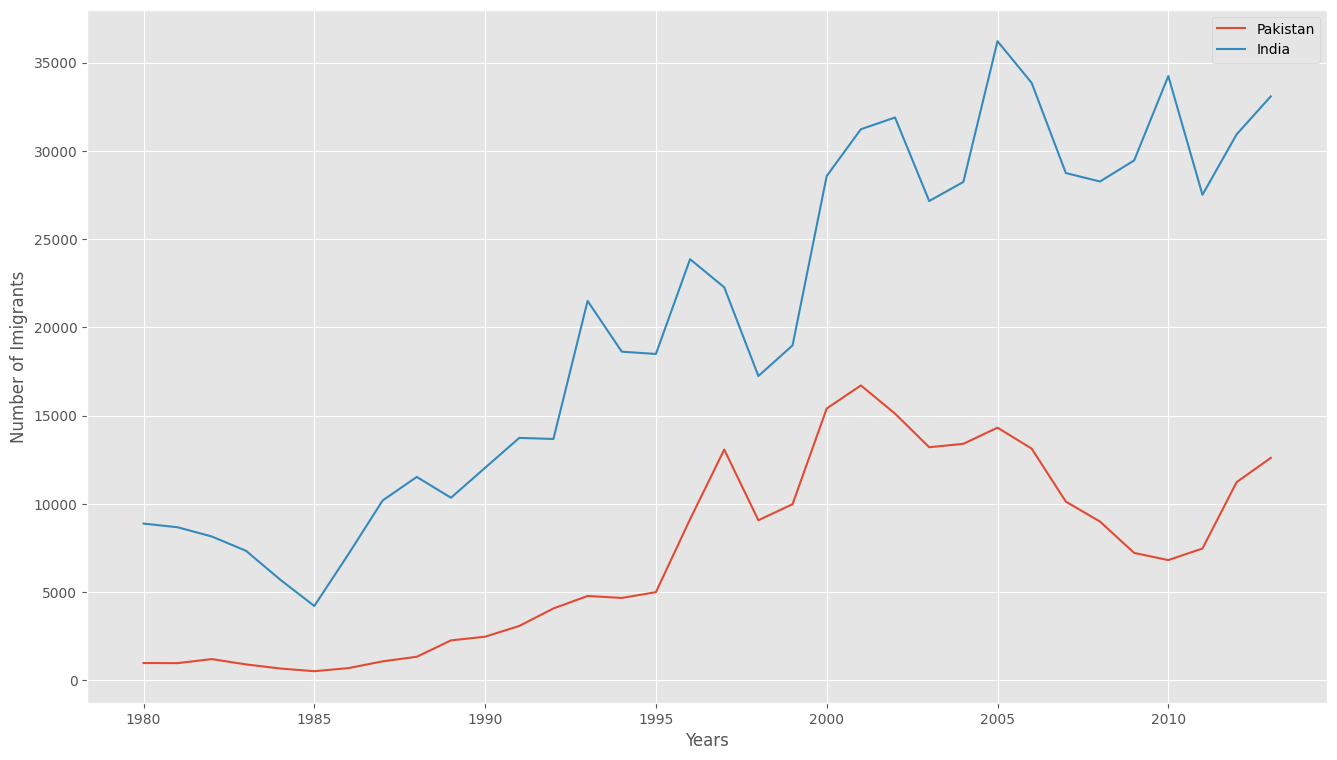

In [83]:
plt.figure(figsize=(16,9))
img_pak.plot(kind = "line")
img_ind.plot(kind = "line")
plt.xlabel("Years")
plt.ylabel("Number of Imigrants")
plt.legend(labels = ["Pakistan", "India"])


In [84]:
continents = data.groupby("Continent", axis=0).sum()

In [85]:
continents.sort_values("Total", ascending=True)

,Coverage,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Oceania,ForeignersForeignersForeignersForeignersForeig...,PolynesiaAustralia and New ZealandMelanesiaMic...,1942,1839,1675,1018,878,920,904,1200,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174
Northern America,CitizensForeigners,Northern AmericaNorthern America,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Africa,ForeignersForeignersForeignersForeignersForeig...,Northern AfricaMiddle AfricaWestern AfricaSout...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Latin America and the Caribbean,ForeignersForeignersForeignersForeignersForeig...,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Europe,ForeignersForeignersForeignersForeignersForeig...,Southern EuropeSouthern EuropeWestern EuropeEa...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Asia,ForeignersForeignersForeignersForeignersForeig...,Southern AsiaWestern AsiaWestern AsiaWestern A...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794


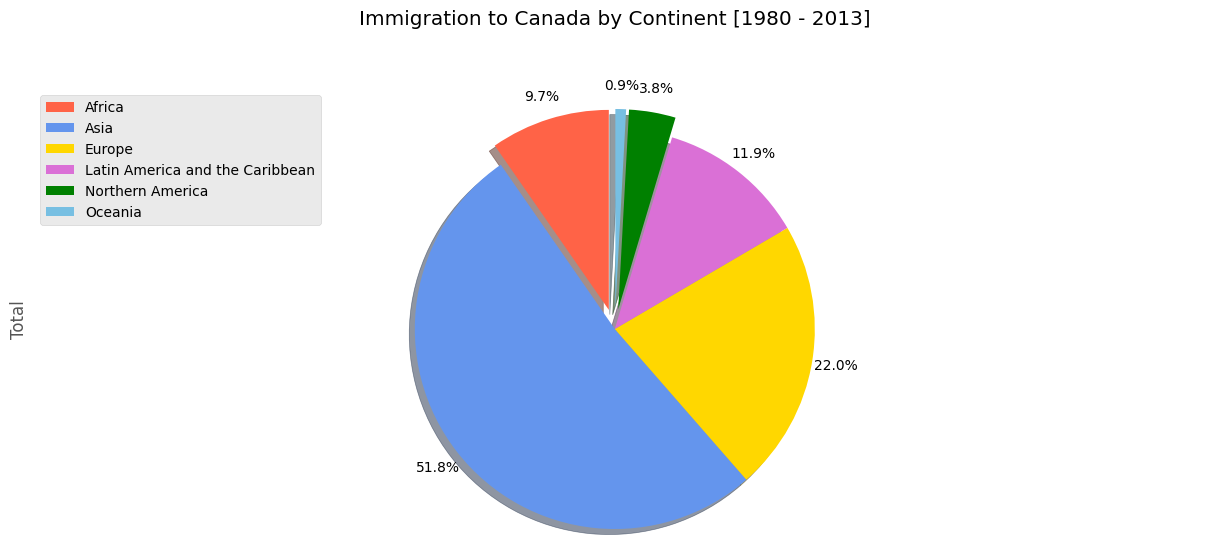

In [86]:
colors=[
        'tomato', 'cornflowerblue', 'gold', 'orchid', 'green',"#77BFE2"]
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 

continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,   
                            colors=colors,  
                            explode=explode_list 
                            )


plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

plt.legend(labels=continents.index, loc='upper left') 

plt.show()

In [87]:
img_china = data.loc["China", year]

<Axes: >

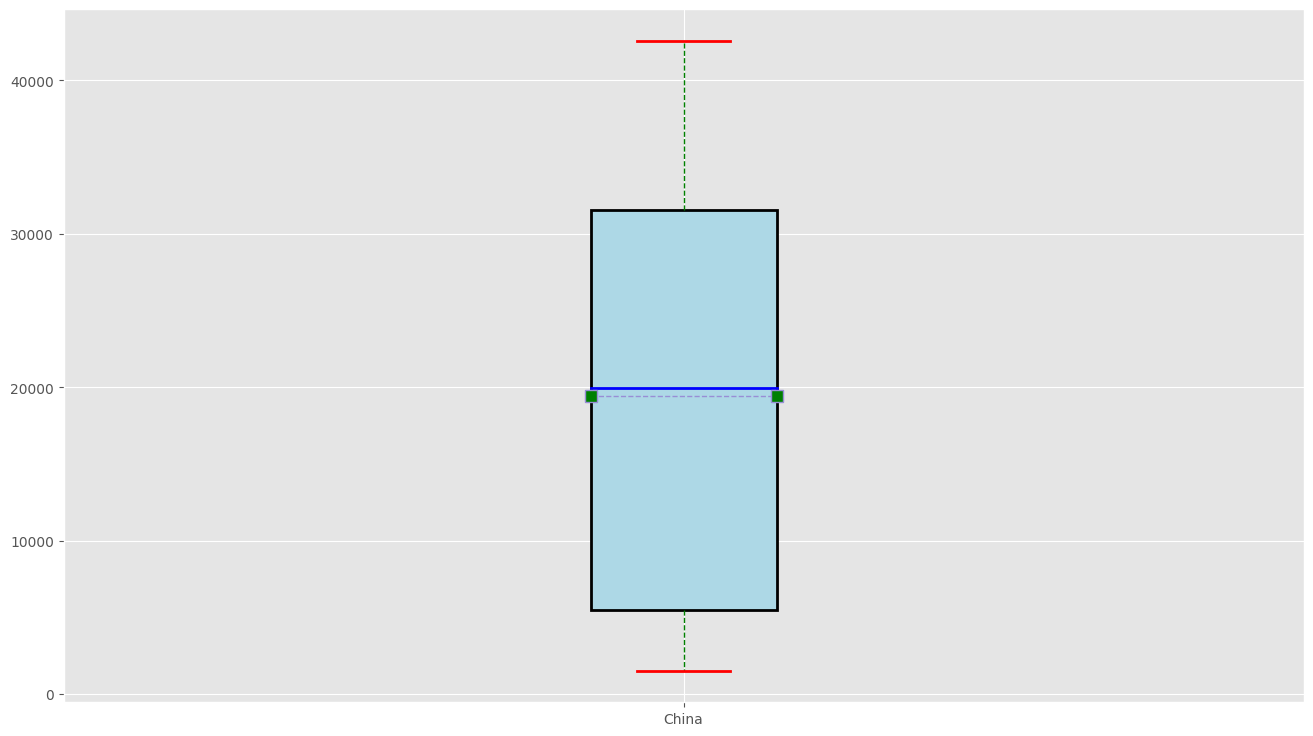

In [88]:
plt.figure(figsize=(16,9))
img_china.plot(kind ='box',whis=1.5, patch_artist=True, showmeans=True, meanline=True,
               boxprops={'facecolor': 'lightblue', 'linewidth': 2},
               whiskerprops={'color': 'green', 'linestyle': '--'},
               capprops={'color': 'red', 'linewidth': 2},
               medianprops={'color': 'blue', 'linewidth': 2},
               flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8},  
               meanprops={'marker': 's', 'markerfacecolor': 'green', 'markersize': 8}
               )

In [89]:
data["Region"].value_counts()

Region
Western Asia                 18
Eastern Africa               17
Western Africa               16
Southern Europe              14
Caribbean                    13
South America                12
Northern Europe              10
South-Eastern Asia           10
Eastern Europe               10
Southern Asia                 9
Middle Africa                 9
Western Europe                9
Central America               8
Eastern Asia                  7
Northern Africa               7
Southern Africa               5
Central Asia                  5
Polynesia                     4
Melanesia                     4
Micronesia                    4
Australia and New Zealand     2
Northern America              2
Name: count, dtype: int64

In [90]:
Region_data = data.groupby("Region").sum()

In [91]:
Region_data.head()

,Coverage,Continent,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Region,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,ForeignersForeigners,OceaniaOceania,1304,1119,848,457,481,467,532,675,...,1279,1193,1383,1498,1538,1423,1226,1399,1536,34215
Caribbean,ForeignersForeignersForeignersForeignersForeig...,Latin America and the CaribbeanLatin America a...,7045,8310,8326,6998,5553,6048,8716,10932,...,6816,6652,7826,8862,8847,10549,11958,11898,10393,308253
Central America,ForeignersForeignersForeignersForeignersForeig...,Latin America and the CaribbeanLatin America a...,734,921,1612,3648,4087,4862,5909,6804,...,3990,4140,5039,4891,4814,5692,5821,6019,5644,161653
Central Asia,ForeignersForeignersForeignersForeignersForeig...,AsiaAsiaAsiaAsiaAsia,0,0,0,0,0,0,0,0,...,1134,903,936,805,962,905,769,1029,691,15024
Eastern Africa,ForeignersForeignersForeignersForeignersForeig...,AfricaAfricaAfricaAfricaAfricaAfricaAfricaAfri...,1471,1641,1426,1094,1187,1134,1454,2734,...,7083,6750,6669,6705,6922,8591,8956,8846,9448,167389


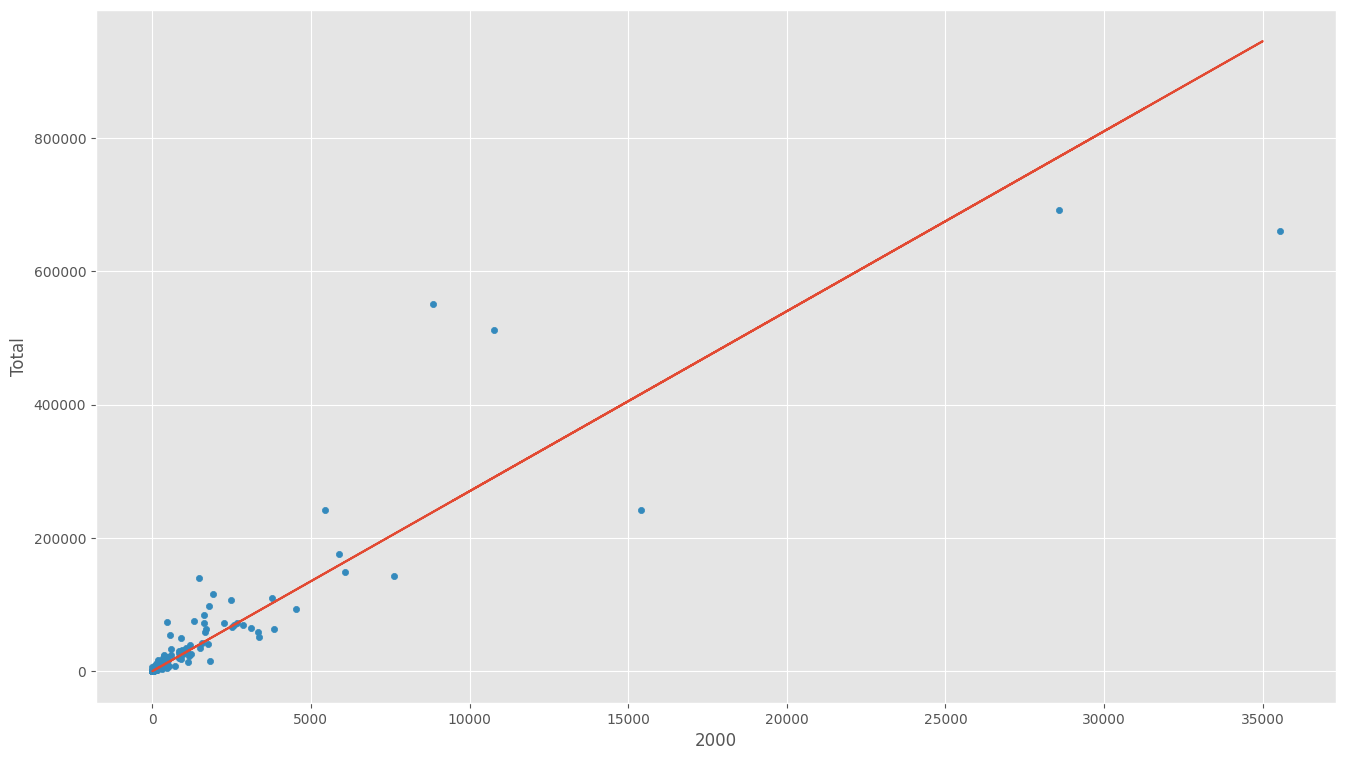

In [92]:
data.plot(kind='scatter', x= '2000' , y = 'Total', figsize=(16,9))
x= np.random.randint(0,35000,10000)
plt.plot(x, 27*x+6) # this is just for showing regression plot I take m and c value


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'Oceania'),
  Text(4, 0, 'Latin America and the Caribbean'),
  Text(5, 0, 'Northern America')])

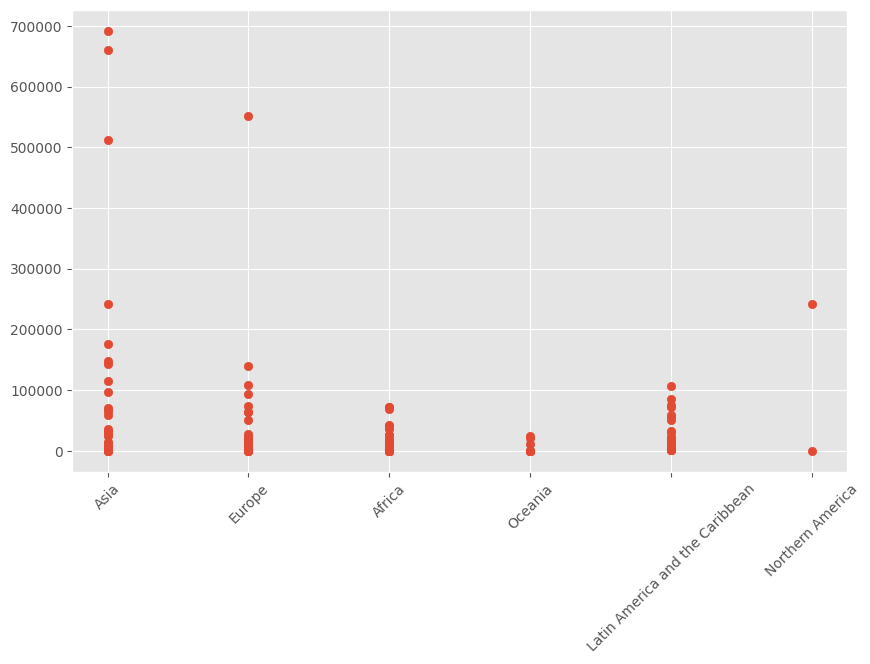

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(data=data, x='Continent', y='Total')
plt.xticks(rotation = 45)

In [94]:
print(columns)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [95]:
years = list(map(str, range(1980, 2014)))
data.sort_values(['Total'], ascending=False, axis=0, inplace=True)
top5 = data.head()
top5 = top5[years].transpose()
top5 = top5.head()
top5

OdName,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


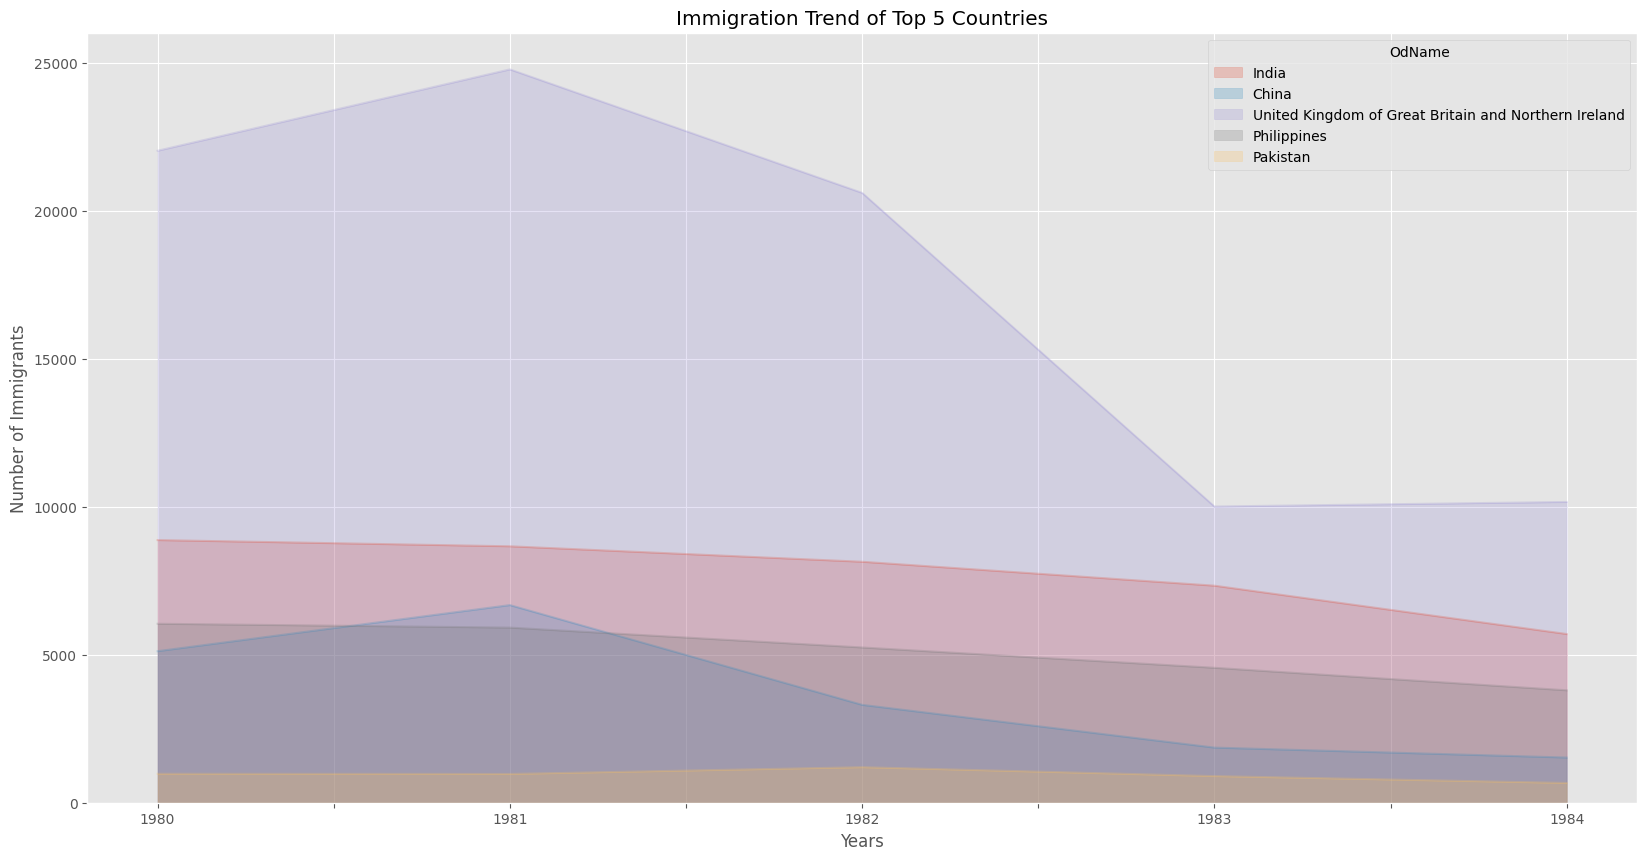

In [96]:
top5.plot(kind='area', 
             alpha=0.25,  
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Denmark'), Text(1, 0, 'Norway'), Text(2, 0, 'Sweden')])

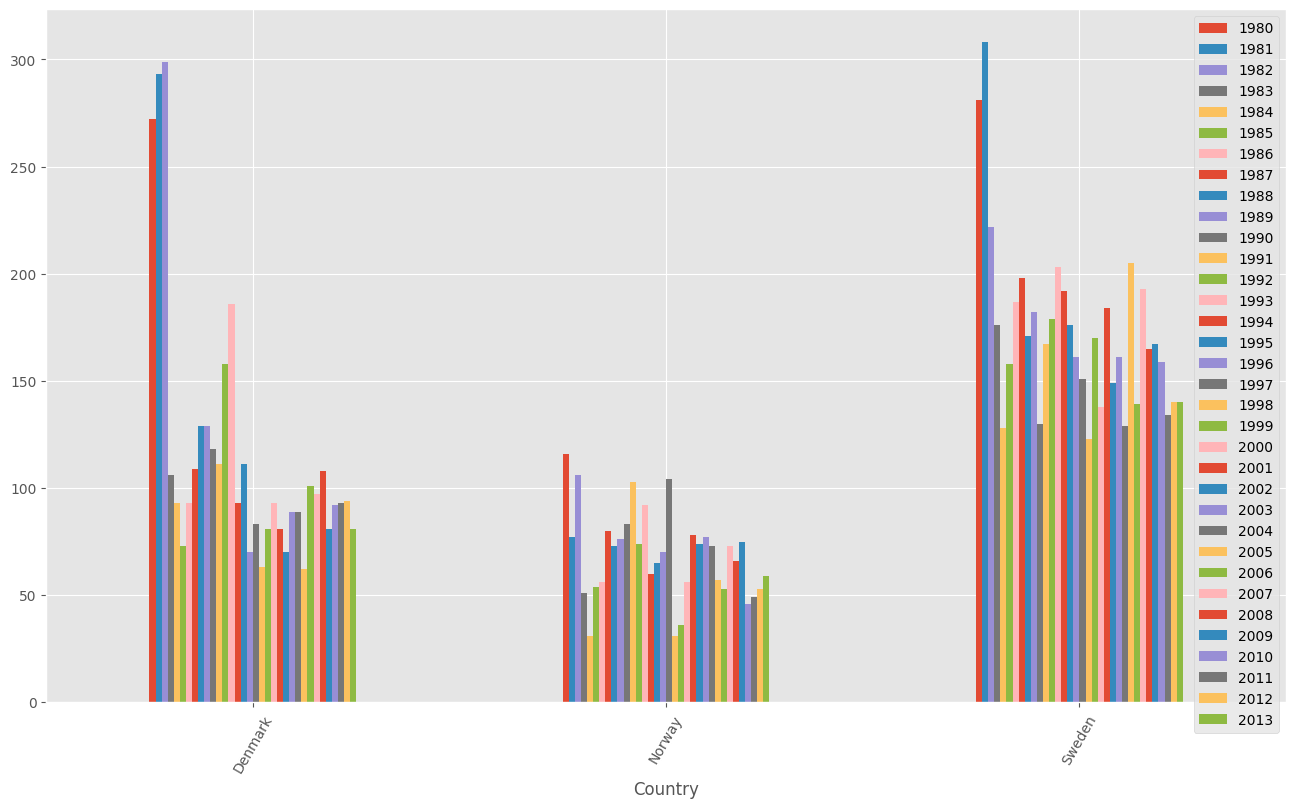

In [97]:
hist_data = data.loc[['Denmark', 'Norway', 'Sweden'], years]
hist_data.plot(kind='bar', figsize=(16,9))
plt.xlabel("Country")
plt.xticks(rotation = 60)

In [98]:
df_t = data.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

OdName,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


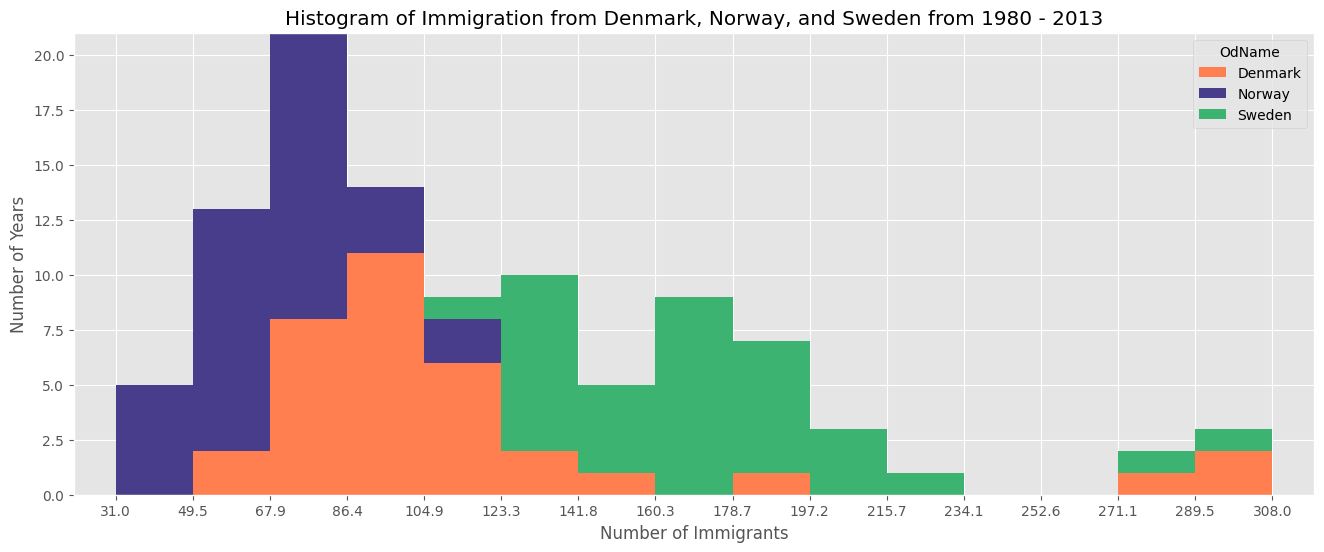

In [99]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10  


df_t.plot(kind='hist',
          figsize=(16, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

#### Stamin Toner showing costal and city Area


In [ ]:
import folium
world_map = folium.Map()
pakistan_map = folium.Map(
    location = [30.3753 , 69.3451],
    zoom_start = 6,
    tiles= 'Stamen Toner'
    )

pakistan_map


#### Stamen Terrain maps showing hilly area and natural vegetation

In [ ]:
pakistan_map = folium.Map(
    location = [30.3753, 69.3451],
    zoom_start= 6,
    tiles= "Stamen Terrain"
)

pakistan_map

In [105]:
df_can = pd.read_csv("./Canada.xlsx")

In [ ]:

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

df_can.columns = list(map(str, df_can.columns))

columns = ['1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013']
df_can["Total"] = df_can[columns].sum(axis=1)

years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

In [108]:
world_geo =  r"D:\#DATA Science\data visualization\countries.geojson"
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [ ]:
# shwoing the total imigration from different countries to canada by countries in map

world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.ADMIN',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

world_map